# German credit data

## Загрузка данных
Загрузим набор данных из интернета. Используем для этого консольную утилиту curl. Флаг <code>-o</code> обозначает целевой файл, в который будут записаны скаченные данные. Если curl не установлен на вашем компьютере, установить его можно командой <code>sudo apt-get install curl</code> из терминала.

Этот набор данных - сведения по кредитам, выданным в Германии. Изначальная версия содержит такие поля, как статус счета клиента, срок кредита, категория клиента в зависимости от количества взятых кредитов и т.д. Мы скачаем немного измененную версию этого набора данных, где категориальные признаки уже преобразованы в числовые. Всю информацию по набору данных можно посмотреть по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

In [46]:
!curl -o german_data.tsv https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 16   99k   16 16384    0     0   4969      0  0:00:20  0:00:03  0:00:17  4969
 80   99k   80 81920    0     0  18269      0  0:00:05  0:00:04  0:00:01 18269
100   99k  100   99k    0     0  22747      0  0:00:04  0:00:04 --:--:-- 25699


Посмотрим первые 10 строк полученного файла утилитой head (на windows из коробки не сработает).

In [47]:
!head german_data.tsv

'head' is not recognized as an internal or external command,
operable program or batch file.


Импортируем pandas и загрузим файл в датафрейм.

In [48]:
import pandas as pd

In [49]:
german_table = pd.read_csv('german_data.tsv', header = None, sep='[\s]*', engine = 'python')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


Посмотрим на размер датасета и на то, как выглядят признаки, записанные в нём.

In [50]:
german_table.shape

(1000, 25)

In [51]:
german_table.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


Переименуем названия признаков так, чтобы к ним было удобно обращаться через точку.

In [52]:
german_table.columns = map(lambda x: 'A' + str(x), german_table.columns)

In [53]:
german_table.dtypes

A0     int64
A1     int64
A2     int64
A3     int64
A4     int64
A5     int64
A6     int64
A7     int64
A8     int64
A9     int64
A10    int64
A11    int64
A12    int64
A13    int64
A14    int64
A15    int64
A16    int64
A17    int64
A18    int64
A19    int64
A20    int64
A21    int64
A22    int64
A23    int64
A24    int64
dtype: object

Целевая переменная записана в колонке А24. Перед нами стоит задача бинарной классификации, и классы здесь представлены следующим образом:
* 1 - хороший заемщик (возвращает кредиты в срок)
* 2 - плохой заемщик (не возвращает)

Посмотрим статистические характеристики признаков внутри каждого из классов.

In [54]:
german_table[german_table.iloc[:, 24] == 1].describe()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,2.865714,19.207143,2.707143,29.862857,2.290000,3.475714,2.722857,2.842857,2.260000,36.224286,...,0.207143,0.122857,0.907143,0.032857,0.155714,0.752857,0.021429,0.205714,0.634286,1.0
std,1.228755,11.079564,1.044753,24.044333,1.651344,1.190441,0.691492,1.108373,1.037688,11.381145,...,0.405549,0.328508,0.290440,0.178390,0.362844,0.431659,0.144912,0.404512,0.481974,0.0
min,1.000000,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.000000,12.000000,2.000000,14.000000,1.000000,3.000000,2.000000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,3.000000,18.000000,2.000000,22.000000,1.000000,3.000000,3.000000,3.000000,2.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0
75%,4.000000,24.000000,4.000000,36.000000,4.000000,5.000000,3.000000,4.000000,3.000000,42.250000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0
max,4.000000,60.000000,4.000000,159.000000,5.000000,5.000000,4.000000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [55]:
german_table[german_table.iloc[:, 24] == 2].describe()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,1.903333,24.860000,2.166667,39.356667,1.673333,3.170000,2.586667,2.850000,2.586667,33.963333,...,0.296667,0.056667,0.906667,0.060000,0.233333,0.620000,0.023333,0.186667,0.620000,2.0
std,1.050874,13.282639,1.078316,35.384691,1.303439,1.224513,0.737769,1.094605,1.045370,11.222379,...,0.457552,0.231591,0.291385,0.237884,0.423659,0.486197,0.151212,0.390295,0.486197,0.0
min,1.000000,6.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.000000,12.000000,2.000000,13.750000,1.000000,2.000000,2.000000,2.000000,2.000000,25.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,2.000000,24.000000,2.000000,26.000000,1.000000,3.000000,3.000000,3.000000,3.000000,31.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.0
75%,2.000000,36.000000,3.000000,51.250000,2.000000,4.000000,3.000000,4.000000,3.000000,40.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.0
max,4.000000,72.000000,4.000000,184.000000,5.000000,5.000000,4.000000,4.000000,4.000000,74.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [56]:
german_table.A24.value_counts()

1    700
2    300
Name: A24, dtype: int64

Назовем эти классы более понятным языком.

In [57]:
german_table.A24 = german_table.A24.apply(lambda x : 'good' if x < 2 else 'bad')

## Визуализация данных
Следующая команда позволит вывести все дальнейшие графики прямо в тетрадку Jupyter.

In [58]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Давайте сравним информацию, которую мы можем увидеть на сводной таблице по признакам, с той, которую можем посмотреть по гистограммам признаков.

In [59]:
german_table[['A0', 'A1', 'A2']].describe()

,A0,A1,A2
count,1000.000000,1000.000000,1000.00000
mean,2.577000,20.903000,2.54500
std,1.257638,12.058814,1.08312
min,1.000000,4.000000,0.00000
25%,1.000000,12.000000,2.00000
50%,2.000000,18.000000,2.00000
75%,4.000000,24.000000,4.00000
max,4.000000,72.000000,4.00000


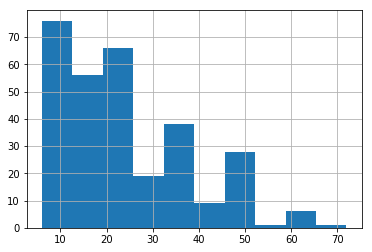

In [60]:
german_table[german_table.A24 == 'bad'].A1.hist()

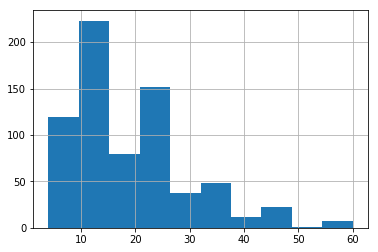

In [61]:
german_table[german_table.A24 == 'good'].A1.hist()

## Генерация выборок
Для проверки качества модели нам понадобится отложенная выборка. Разделим выборку на обучающую и тестовую (отложенную), а также выделим вектор целевой переменной в отдельный объект <code>y</code>. Функция <code>train_test_split</code> как раз производит это разделение.

In [62]:
from sklearn.model_selection import train_test_split

Приведем целевую переменную к "классическому" для задачи бинарной классификации виду: пронумеруем возможные классы объектов нулем и единицей.

In [63]:
german_table.A24 = german_table.A24.apply(lambda x : 0 if x == 'good'  else 1)

Можем приступать к разделению выборки. На вход функция <code>train_test_split</code> принимает исходную матрицу объектов-признаков X и вектор верных ответов y. В нашем случае Х - это вся исходная матрица, кроме последнего столбца, а у - последний столбец нашей матрицы german_table.
На выходе получаем кортеж длины 4: тренировочную и тестовую матрицы объектов-признаков и тренировочный и тестовый вектора ответов.
Параметр <code>test_size</code> задаёт долю объектов, которые попадут в тестовую выборку. Если в качестве этого параметра подается целое число, то размер тестовой выборки будет равен этому числу. В противоположность параметру <code>test_size</code> можно также использовать параметр <code>train_size</code>, который задает то же самое для размера тренировочной выборки.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(german_table.iloc[:, :-1], german_table.A24, test_size = 0.5)

Посмотрим, как теперь выглядят X_train и X_test.

In [65]:
X_train.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
478,2,12,2,10,2,4,3,4,1,39,...,1,0,0,1,0,0,1,0,1,0
476,4,39,2,26,3,3,3,4,3,24,...,1,0,1,1,0,0,1,0,0,1
739,2,30,0,43,2,3,2,4,3,26,...,1,0,0,1,0,1,0,0,1,0
798,4,24,3,7,5,5,4,4,3,54,...,1,1,0,1,0,0,1,0,0,1
469,4,24,3,47,1,4,3,3,3,35,...,1,0,1,1,0,0,1,0,1,0


In [66]:
X_test.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
745,1,13,4,18,1,2,3,1,2,28,...,1,0,0,1,0,0,1,0,1,0
837,4,4,2,6,1,2,2,3,1,23,...,1,0,0,1,0,1,0,0,1,0
36,4,48,4,61,1,3,3,3,4,31,...,1,0,0,1,0,0,0,0,0,1
691,2,15,2,26,2,3,2,2,1,25,...,1,0,0,1,0,0,1,0,1,0
97,2,18,2,26,2,3,3,4,3,34,...,1,0,0,1,0,0,1,0,0,1


Вектора правильных ответов для выборок:

In [67]:
y_train[:10]

478    0
476    0
739    1
798    0
469    0
203    1
920    0
375    1
569    1
603    1
Name: A24, dtype: int64

In [68]:
y_test[:10]

745    0
837    0
36     0
691    0
97     0
94     0
886    0
61     0
389    0
143    1
Name: A24, dtype: int64

Обратите внимание на индексы в новых наборах данных: объекты попали в эти выборки по случайному принципу. Подробнее про разбиение выборки можно прочитать в документации pandas: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Обучение модели
Попробуем классифицировать наших заёмщиков с помощью одного из самых популярных методов классификации - логистической регрессии. Импортируем класс, в котором она реализована:

In [69]:
from sklearn.linear_model import LogisticRegression

Зафиксируем параметр random_state для воспроизводимости результатов:

In [70]:
model = LogisticRegression(random_state = 10)

Обучим нашу модель на тренировочных данных и получим предсказания для тестовой выборки.

In [71]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_pred = model.predict(X_test)

Одним из свойств линейных методов является то, что ошибка предсказаний на тренировочной выборке в общем случае ненулевая, даже несмотря на то, что мы обучали наш классификатор ровно на этих же объектах.

In [73]:
y_train_pred = model.predict(X_train)

Предсказания для первых 10 объектов тестовой выборки:

In [74]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Оценка качества
Посмотрим, какую долю правильных ответов даст нам наш линейный классификатор для каждой из выборок.

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
print("accuracy score %f" % accuracy_score(y_train, y_train_pred))

accuracy score 0.796000


In [77]:
print("accuracy score %f" % accuracy_score(y_test, y_pred))

accuracy score 0.754000


Видим, что значения качества модели на тренировочной и тестовой выборках практически не отличаются - значит, модель не переобучена.

## Решающее дерево
Рассмотрим другой популярный алгоритм машинного обучения - решающее дерево. Проведем все те же операции для него.

In [78]:
from sklearn.tree import DecisionTreeClassifier

Зафиксируем параметр random_state для воспроизводимости результатов:

In [79]:
tree = DecisionTreeClassifier(random_state = 10)

Обучение:

In [80]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

Получим предсказания для тестовой выборки:

In [81]:
y_pred = tree.predict(X_test)

И выведем долю верных ответов:

In [82]:
print("accuracy score %f" % accuracy_score(y_test, y_pred))

accuracy score 0.680000


Посмотрим, какое качество предсказания даст решающее дерево на тренировочной выборке.

In [83]:
y_train_pred = tree.predict(X_train)

In [84]:
print 'accuracy score %f' % accuracy_score(y_train, y_train_pred)

SyntaxError: invalid syntax (<ipython-input-84-1cb09f56b98a>, line 1)

Идеальное качество! Выглядит подозрительно. Но на самом деле просто у решающих деревьев такое свойство: при построении их до максимальной глубины они получаются максимально переобученными на обучающую выборку, поскольку продолжают делить её по предикатам до тех пор, пока в каждом листе не останутся объекты только одного класса (в том числе это происходит и с выбросами).

Давайте попробуем переобучить дерево не так сильно - для этого будем строить его не до максимальной глубины, а до выполнения некоторого условия: пусть в каждом листе дерева будет не меньше 10 объектов. Тогда оно не будет создавать отдельные правила для тех объектов, которые попали в область какого-то из классов случайно.

In [ ]:
short_tree = DecisionTreeClassifier(min_samples_leaf=10, random_state=10)

Обучим наше "укороченное" дерево и посмотрим на качество классификации.

In [ ]:
short_tree.fit(X_train, y_train)

In [ ]:
y_pred = short_tree.predict(X_test)

In [ ]:
y_train_pred = short_tree.predict(X_train)

Доля верных предсказаний на обучающей выборке уже не такая идеальная.

In [ ]:
print("accuracy score %f" % accuracy_score(y_train, y_train_pred))

Зато на тесте эта метрика чуть выше.

In [ ]:
print("accuracy score %f" % accuracy_score(y_test, y_pred))

Значения accuracy на тестовой и на обучающей выборках получились ближе друг к другу - значит, мы уже больше можем надеяться на стабильность качества полученного классификатора. Выведем также сборную таблицу по метрикам качества нашего дерева:

In [ ]:
print classification_report(y_test, y_pred)

И заодно посмотрим на количество True Positive, True Negative, False Positive и False Negative предсказаний модели. (False Positive еще называют ошибками первого рода, а False Negative - ошибками второго рода.)

In [ ]:
confusion_matrix(y_test, y_pred)

## Случайный лес

Как еще можно повысить стабильность качества предсказаний классификатора? Давайте обучим несколько независимых деревьев на разных подвыборках обучающей выборки и для каждого нового объекта устроим голосование классификаторов. Такой подход называется случайным лесом.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Зафиксируем параметр <code>random_state</code> для воспроизводимости результатов. Создадим случайный лес из 100 решающих деревьев (параметр <code>n_estimators</code>. Параметр <code>n_jobs</code> задает количество параллельных потоков, с которым будет происходить обучение леса. Подробнее можно прочитать в документации: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
forest = RandomForestClassifier(random_state=10, n_estimators=100, n_jobs=-1)

Обучим случайный лес на тех же данных и сравним результат на обеих выборках.

In [ ]:
forest.fit(X_train, y_train)

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
y_train_pred = forest.predict(X_train)

На тестовой выборке качество предсказаний еще немного улучшилось.

In [ ]:
print("accuracy score %f" % accuracy_score(y_test, y_pred))

А на обучающей выборке у нас снова идеальное качество. Однако переобучения в данном случае нет, поскольку мы используем не одну модель, а много независимых алгоритмов. Мы обучили 100 деревьев до максимальной глубины на разных подвыборках тренировочных данных - то есть для каждого объекта тренировочной выборки большинство деревьев уже знают правильный ответ.

In [ ]:
print("accuracy score %f" % accuracy_score(y_train, y_train_pred))

# Кривые обучения

Как еще можно бороться с переобучением? Напрашивается очевидный ответ: чтобы модель не подстраивалась под небольшую выборку объектов, эту выборку нужно увеличить. Но сбор данных зачастую стоит дополнительного времени и денег, поэтому мы не можем себе позволить бездумно собирать огромные массивы данных. Но как понять, что мы располагаем уже достаточным количеством данных?

Сейчас мы построим график, который называется кривыми обучения.

In [ ]:
from sklearn.model_selection import learning_curve

Возьмем нашу изначальную полную выборку объектов и будем её делить на тренировочную и тестовую в различных соотношениях. В зависимости от объема тренировочной выборки качество модели на тестовых данных будет каким-то образом меняться.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, german_table.iloc[:, :-1], german_table.A24, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

Переобучение - это та ситуация, когда на тренировочной выборки модель показывает хороший результат (чаще всего - завышенно хороший), а на новых данных качество алгоритма проседает. В левой части графика мы наблюдаем именно эту ситуацию.

Однако чем больше обучающая выборка, тем ближе кривые друг к другу и тем стабильней работает алгоритм. На графике ниже средняя точка (около 330 объектов по оси абсцисс) показывает тот размер обучающей выборки, который будет достаточен для адекватного обучения алгоритма на данных этой природы. Правее него на графике мы значительно увеличиваем объем обучающей выборки (как и наши трудозатраты), но по качеству классификации выигрываем пренебрежимо слабо.

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.xlabel("Количество объектов в тренировочной выборке")
pylab.ylabel("Accuracy score")
pylab.legend(loc='lower right')